In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DB_MidtermSampleData_Mar21.csv')

In [3]:
# remove empty
df = df.loc[df['region'] != 'empty']

In [4]:
df['year'] = pd.DatetimeIndex(df['month']).year
df['month_in_year'] = pd.DatetimeIndex(df['month']).month

In [5]:
df.columns

Index(['company', 'sector', 'month', 'job_category', 'region', 'gender',
       'count', 'inflow', 'outflow', 'year', 'month_in_year'],
      dtype='object')

In [6]:
# Regions 
df['region'].unique()

array(['South America', 'Pacific Islands', 'Northern America',
       'Western Europe', 'South-Eastern Asia', 'Eastern Europe',
       'Eastern Asia', 'Northern Africa', 'Central and Western Asia',
       'Sub-Saharan Africa', 'Southern Asia',
       'Central America and the Caribbean', 'Northern Europe',
       'Arab States', 'Southern Europe'], dtype=object)

In [7]:
# Sectors
df['sector'].unique()

array(['Information Technology', 'Financials', 'Industrials',
       'Consumer Discretionary', 'Consumer Staples', 'Communication',
       'Health Care'], dtype=object)

In [8]:
df['job_category'].unique()

array(['technician', 'scientist', 'sales', 'administrative', 'management',
       'marketing', 'engineer', 'finance', 'empty'], dtype=object)

In [9]:
sorted(df['year'].unique())

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [10]:
df.corr()

,count,inflow,outflow,year,month_in_year
count,1.000000,0.869422,0.868337,0.009700,0.000860
inflow,0.869422,1.000000,0.901727,0.005109,-0.015200
outflow,0.868337,0.901727,1.000000,0.009655,-0.003194
year,0.009700,0.005109,0.009655,1.000000,-0.027513
month_in_year,0.000860,-0.015200,-0.003194,-0.027513,1.000000


# Distribution of males and females for most recent month

In [11]:
recent_month = df['month'].max()
recent_month

'2021-01'

In [12]:
df_female = df.loc[(df['gender'] == 'female') & 
                   (df['month'] == recent_month), :]

df_male = df.loc[(df['gender'] == 'male') &
                 (df['month'] == recent_month), :]

In [13]:
region_female = df_female.groupby('region', as_index=False).agg({'count': 'mean'}).sort_values('region')

region_male = df_male.groupby('region', as_index=False).agg({'count': 'mean'}).sort_values('region')

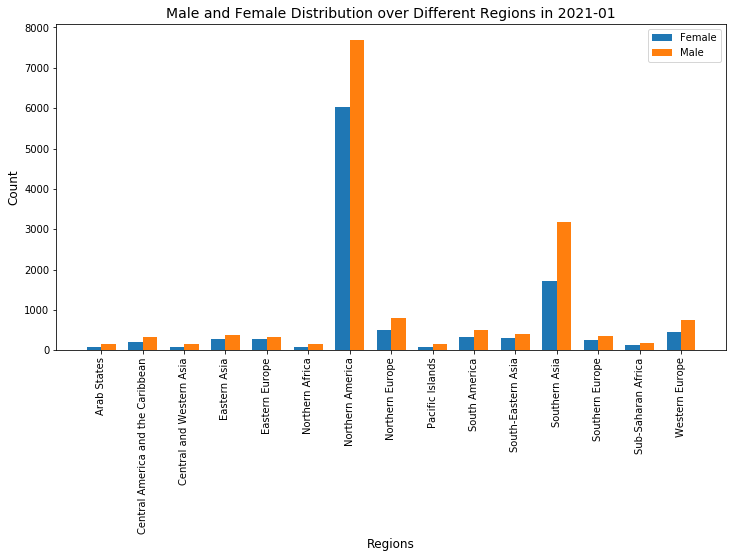

In [14]:
n = np.arange(len(region_female['region'])) # the label locations
width = 0.35  # the width of the bars
upper_limit = max(region_female['count'].max(), region_male['count'].max())+1000 # max limit of y axis
label = list(region_female['region'])

f = list(region_female['count'])
m = list(region_male['count'])


# Graph
fig, ax = plt.subplots(figsize=(12,6))

rects1 = ax.bar(n - width/2, f, width, label='Female')
rects2 = ax.bar(n + width/2, m, width, label='Male')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count', size= 12)
ax.set_xlabel('Regions', size= 12)
ax.set_title('Male and Female Distribution over Different Regions in '+ recent_month, size=14)
ax.set_xticks(n)
ax.set_xticklabels(label)
plt.xticks(rotation=90)

ax.legend()

# How Inflow of Female changes over time
## Assuming inflow represents a firm acquiring new talents

In [15]:
# Set Values
sector = 'Information Technology'
region = 'Northern America'
job = 'engineer'

In [16]:
# Females
females = df.loc[(df['sector'] == sector) & 
                 (df['region'] == region) &
                 (df['gender'] == 'female') &
                 (df['job_category'] == job),
                 ['company','month', 'count', 'inflow', 'outflow', 'year', 'month_in_year']]

# Males
males = df.loc[(df['sector'] == sector) & 
                 (df['region'] == region) &
                 (df['gender'] == 'male') &
                 (df['job_category'] == job),
                 ['company','month', 'count', 'inflow', 'outflow', 'year', 'month_in_year']]

In [17]:
# Females inflow
female_inflow = (females.groupby(['company','year'], as_index=False)
                 .agg({'inflow':'mean'})
                 .sort_values(['company','year']))

# Males inflow
male_inflow = (males.groupby(['company','year'], as_index=False)
                 .agg({'inflow':'mean'})
                 .sort_values(['company','year']))

In [18]:
female_company = female_inflow['company'].unique()

In [19]:
max_inflow = female_inflow['inflow'].max()
min_inflow = female_inflow['inflow'].min()

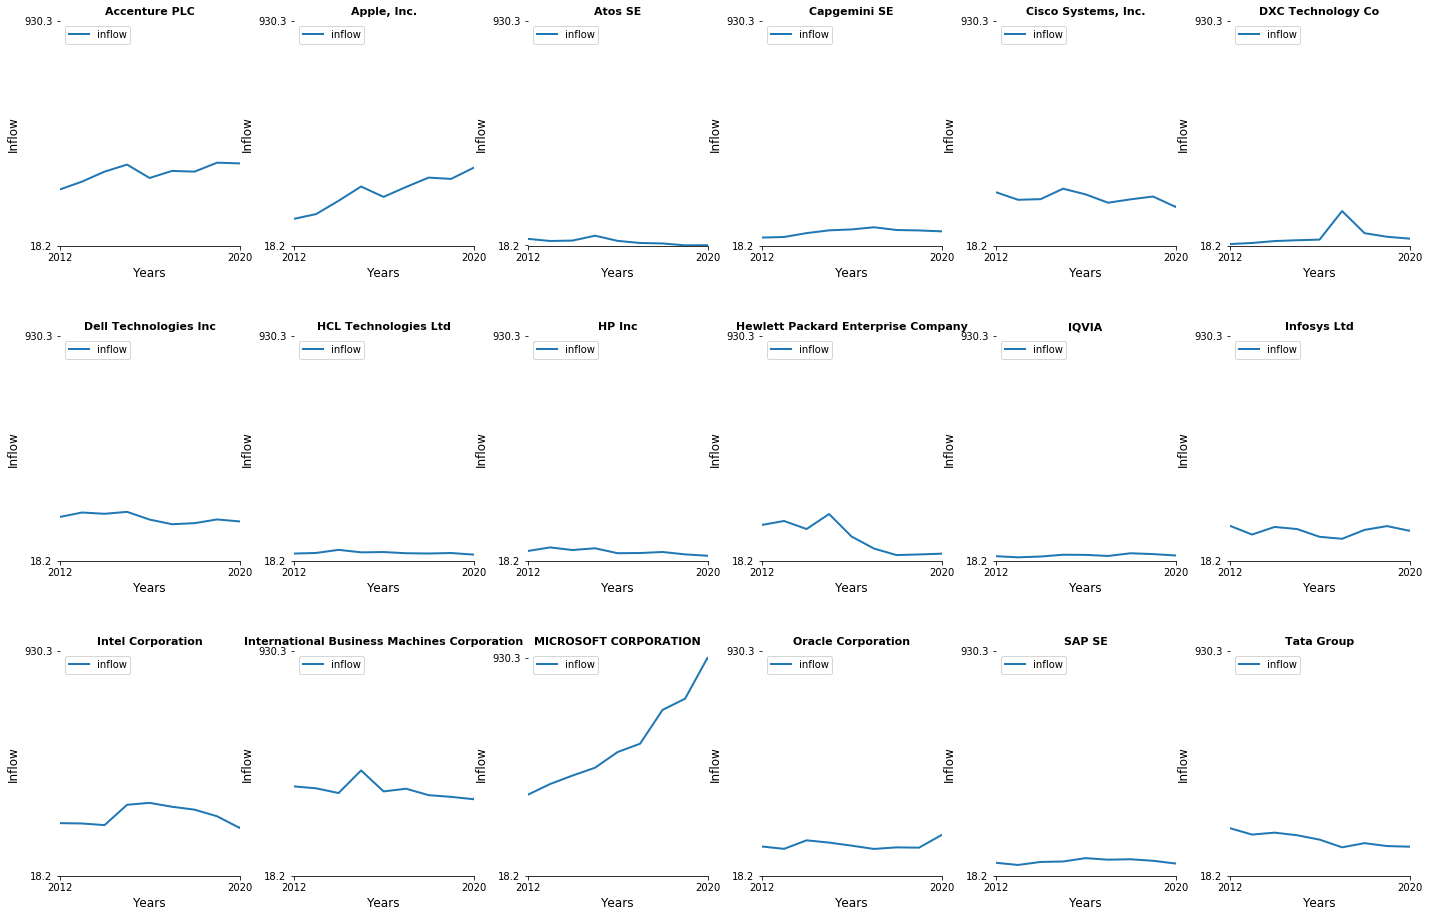

In [20]:
fig, ax = plt.subplots(nrows = 3, ncols= 6, figsize=(10,5))
fig.subplots_adjust(right=2, top=2.5, wspace = 0.3, hspace = 0.4)
#fig.tight_layout()
c = 0 
for i in range(0, 3):
    for j in range(0,6):
        df_female_inflow = female_inflow.loc[female_inflow['company'] == female_company[c], 
                                      ['year', 'inflow']].sort_values('year')
        
        df_female_inflow.plot(ax=ax[i][j], x = 'year', y = 'inflow', linewidth=2)
        
        ax[i][j].set_title(female_company[c], size=11, fontweight="bold")
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].set_xlim(2012, 2020)
        ax[i][j].set_xticks([2012,2020])
        ax[i][j].set_yticks([min_inflow, max_inflow])
        ax[i][j].legend(loc="upper left")
        ax[i][j].set_xlabel('Years', size=12)
        ax[i][j].set_ylabel('Inflow', size=12)
        c+=1

# How Inflow and Outflow of Female changes over time

## Assuming Outflow represents the ability of a firm to retain employees.

In [21]:
# Set Values
sector = 'Information Technology'
region = 'Northern America'
job = 'engineer'

In [22]:
# Females
females = df.loc[(df['sector'] == sector) & 
                 (df['region'] == region) &
                 (df['gender'] == 'female') &
                 (df['job_category'] == job),
                 ['company','month', 'count', 'inflow', 'outflow', 'year', 'month_in_year']]

In [23]:
# Females inflow
female_flow = (females.groupby(['company','year'], as_index=False)
                 .agg({'inflow':'mean', 'outflow':'mean'})
                 .sort_values(['company','year']))

In [24]:
female_company = female_flow['company'].unique()

In [25]:
max_outflow = female_flow['outflow'].max()
min_outflow = female_flow['outflow'].min()

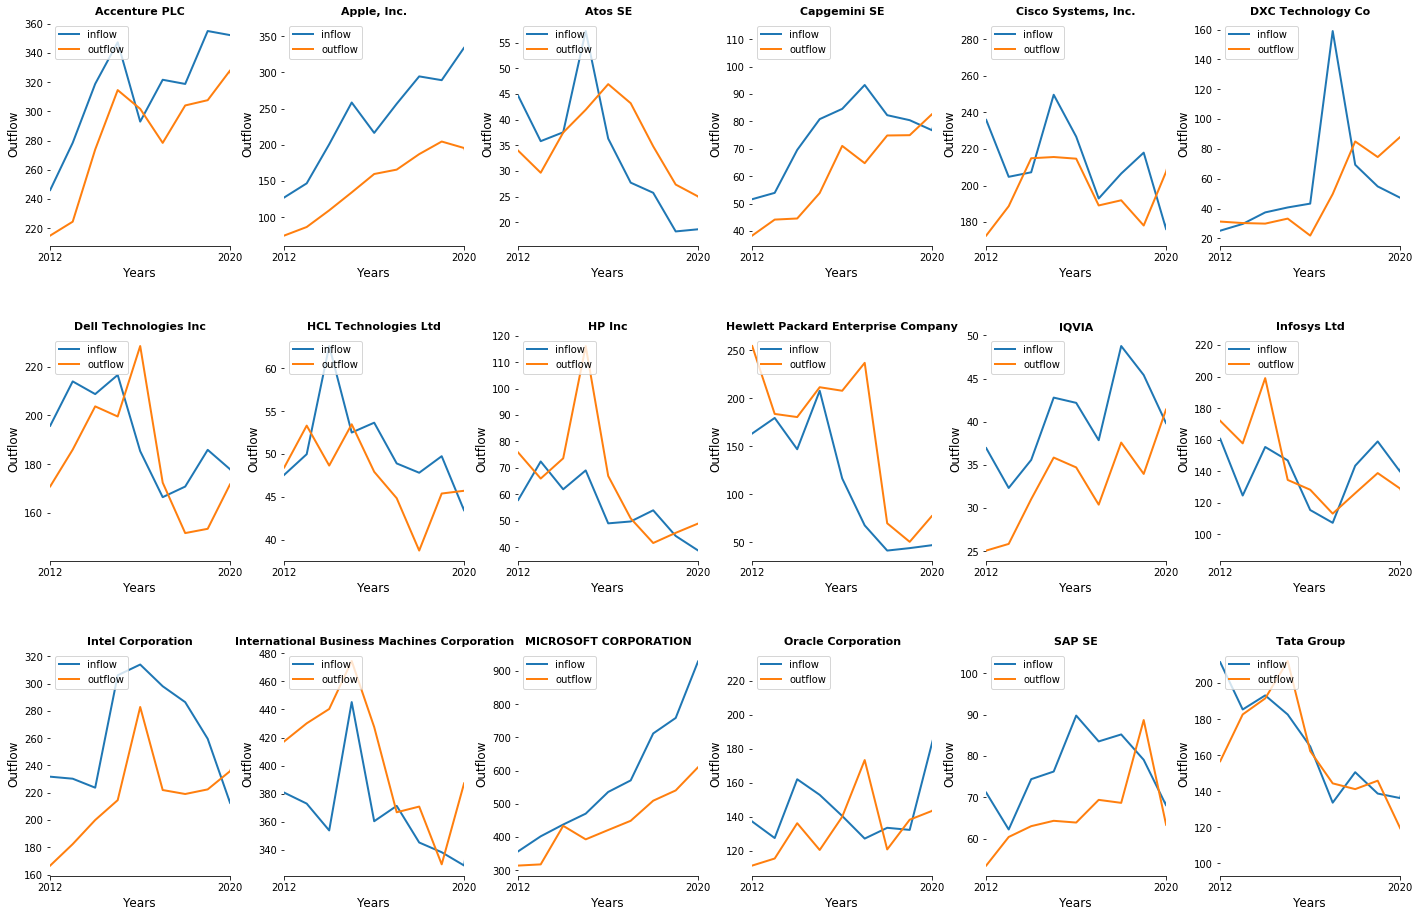

In [26]:
fig, ax = plt.subplots(nrows = 3, ncols= 6, figsize=(10,5))
fig.subplots_adjust(right=2, top=2.5, wspace = 0.3, hspace = 0.4)

c = 0 
for i in range(0, 3):
    for j in range(0,6):
        # Inflow
        df_female_inflow = female_flow.loc[female_flow['company'] == female_company[c], 
                                      ['year', 'inflow']].sort_values('year')
        
        df_female_inflow.plot(ax=ax[i][j], x = 'year', y = 'inflow', linewidth=2)
        
        # Outflow
        df_female_outflow = female_flow.loc[female_flow['company'] == female_company[c], 
                                      ['year', 'outflow']].sort_values('year')
        
        df_female_outflow.plot(ax=ax[i][j], x = 'year', y = 'outflow', linewidth=2)
        
        ax[i][j].set_title(female_company[c], size=11, fontweight="bold")
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].set_xlim(2012, 2020)
        ax[i][j].set_xticks([2012,2020])
        #ax[i][j].set_yticks([min_outflow, max_outflow])
        ax[i][j].legend(loc="upper left")
        ax[i][j].set_xlabel('Years', size=12)
        ax[i][j].set_ylabel('Outflow', size=12)
        c+=1

# Spikes in the inflow might represent a company expanding or developing R&D while a spike in outflow might mean a company struggling to retain its talent, restructuring or showing itself to be more competitive to shareholders

# Male vs Female inflow

In [27]:
mf_max_inflow = max(female_inflow['inflow'].max(), male_inflow['inflow'].max())
mf_min_inflow = min(female_inflow['inflow'].min(), male_inflow['inflow'].min())

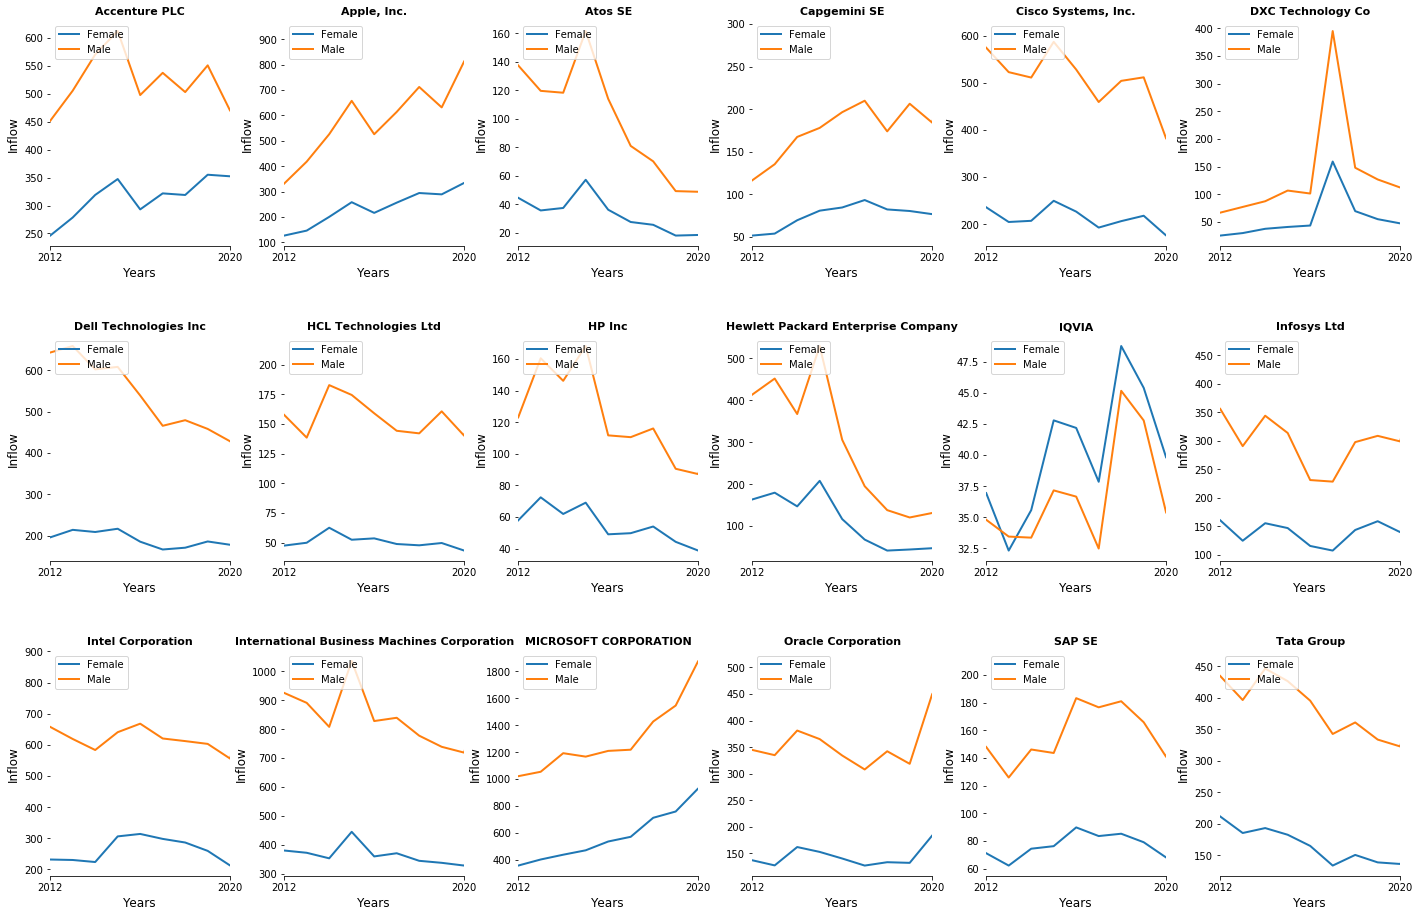

In [28]:
fig, ax = plt.subplots(nrows = 3, ncols= 6, figsize=(10,5))
fig.subplots_adjust(right=2, top=2.5, wspace = 0.3, hspace = 0.4)
#fig.tight_layout()
c = 0 
for i in range(0, 3):
    for j in range(0,6):
        df_female_inflow = female_inflow.loc[female_inflow['company'] == female_company[c], 
                                      ['year', 'inflow']].sort_values('year')
        
        df_female_inflow.plot(ax=ax[i][j], x = 'year', y = 'inflow', linewidth=2)
        
        df_male_inflow = male_inflow.loc[male_inflow['company'] == female_company[c], 
                                      ['year', 'inflow']].sort_values('year')
        
        df_male_inflow.plot(ax=ax[i][j], x = 'year', y = 'inflow', linewidth=2)
        
        
        ax[i][j].set_title(female_company[c], size=11, fontweight="bold")
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].set_xlim(2012, 2020)
        ax[i][j].set_xticks([2012,2020])
        #ax[i][j].set_yticks([mf_min_inflow, mf_max_inflow])
        ax[i][j].legend(['Female', 'Male'], loc="upper left")
        ax[i][j].set_xlabel('Years', size=12)
        ax[i][j].set_ylabel('Inflow', size=12)
        c+=1

# Male and female Outflow

In [29]:
# Set Values
sector = 'Information Technology'
region = 'Northern America'
job = 'engineer'

In [30]:
# Females
females = df.loc[(df['sector'] == sector) & 
                 (df['region'] == region) &
                 (df['gender'] == 'female') &
                 (df['job_category'] == job),
                 ['company','month', 'count', 'inflow', 'outflow', 'year', 'month_in_year']]

# Males
males = df.loc[(df['sector'] == sector) & 
                 (df['region'] == region) &
                 (df['gender'] == 'male') &
                 (df['job_category'] == job),
                 ['company','month', 'count', 'inflow', 'outflow', 'year', 'month_in_year']]

In [31]:
# Females inflow
female_flow = (females.groupby(['company','year'], as_index=False)
                 .agg({'inflow':'mean', 'outflow':'mean'})
                 .sort_values(['company','year']))

# Males inflow
male_flow = (males.groupby(['company','year'], as_index=False)
                 .agg({'inflow':'mean','outflow':'mean'})
                 .sort_values(['company','year']))

In [32]:
female_company = female_flow['company'].unique()

In [33]:
mf_max_outflow = max(female_flow['outflow'].max(), male_flow['outflow'].max())
mf_min_outflow = min(female_flow['outflow'].min(), male_flow['outflow'].min())

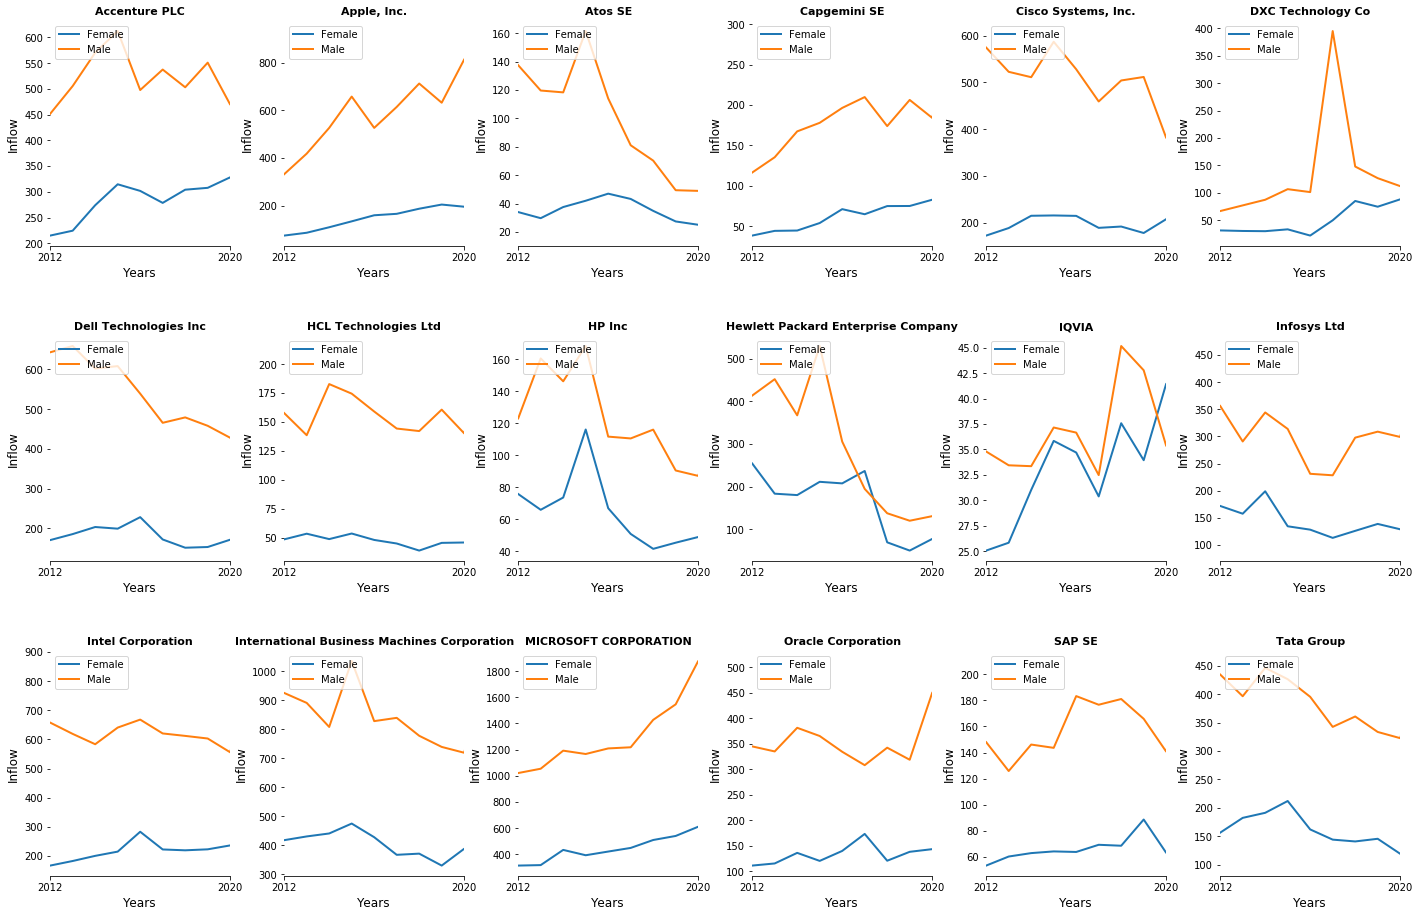

In [34]:
fig, ax = plt.subplots(nrows = 3, ncols= 6, figsize=(10,5))
fig.subplots_adjust(right=2, top=2.5, wspace = 0.3, hspace = 0.4)
#fig.tight_layout()
c = 0 
for i in range(0, 3):
    for j in range(0,6):
        df_female_outflow = female_flow.loc[female_flow['company'] == female_company[c], 
                                      ['year', 'outflow']].sort_values('year')
        
        df_female_outflow.plot(ax=ax[i][j], x = 'year', y = 'outflow', linewidth=2)
        
        df_male_outflow = male_flow.loc[male_flow['company'] == female_company[c], 
                                      ['year', 'inflow']].sort_values('year')
        
        df_male_outflow.plot(ax=ax[i][j], x = 'year', y = 'inflow', linewidth=2)
        
        
        ax[i][j].set_title(female_company[c], size=11, fontweight="bold")
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].set_xlim(2012, 2020)
        ax[i][j].set_xticks([2012,2020])
        #ax[i][j].set_yticks([mf_min_inflow, mf_max_inflow])
        ax[i][j].legend(['Female', 'Male'], loc="upper left")
        ax[i][j].set_xlabel('Years', size=12)
        ax[i][j].set_ylabel('Inflow', size=12)
        c+=1

# We can see that females are less likely to leave the firm as compared to males - However, IQVIA is interesting as Females are leaving more is this because of the enviroment or management?